In [33]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = psycopg2.connect("dbname=testdb user=abarciauskas")

cur = conn.cursor()

cur.execute("SELECT Length FROM documents;")
doc_lengths = cur.fetchall()
doc_lengths[0:10]

[(51,), (15,), (140,), (101,), (10,), (9,), (28,), (79,), (86,), (5,)]

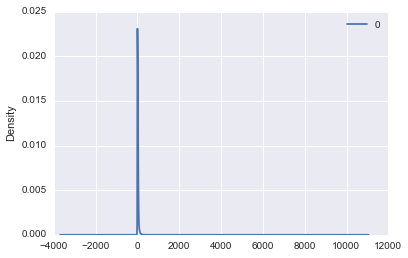

In [17]:
%matplotlib inline

df = pd.DataFrame(doc_lengths)
df.plot(kind='density')

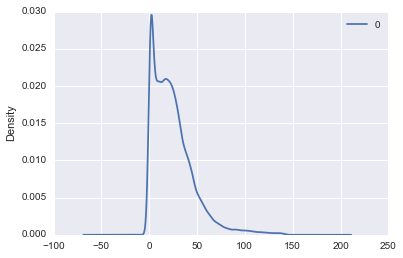

In [34]:
%matplotlib inline

# percentile_cont(fraction) WITHIN GROUP (ORDER BY sort_expression)
# continuous percentile: returns a value corresponding to the specified fraction in the ordering,
# interpolating between adjacent input items if needed
# http://www.postgresql.org/docs/current/static/functions-aggregate.html
query_string = "SELECT percentile_disc(0.99) WITHIN GROUP (ORDER BY Length) FROM documents;"
cur.execute(query_string)
length_99percent = cur.fetchall()[0][0]

query_string = "select Length from documents where Length <= " + str(length_99percent)
cur.execute(query_string)
doc_lengths = cur.fetchall()
df = pd.DataFrame(doc_lengths)
df.plot(kind='density')

In [38]:
avg_doc_length = np.mean(doc_lengths)
print "Average length of document in SPLIT_NORM: " + str(avg_doc_length)
print "Max length of document in SPLIT_NORM: " + str(np.max(doc_lengths))
print "Median length of document in SPLIT_NORM: " + str(np.median(doc_lengths))

Average length of document in SPLIT_NORM: 24.7536123882
Max length of document in SPLIT_NORM: 141
Median length of document in SPLIT_NORM: 21.0


In [ ]:
# time to read in documents into database

